In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data Pre-Proc

In [ ]:
# Memuat dataset Titanic
titanic_data = pd.read_csv('train.csv')

# Menghapus kolom 'PassengerId', 'Name', 'Ticket', dan 'Cabin' dikarenakan tidak diperlukan
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# One-hot encoding untuk kolom 'Embarked'
embarked_encoded = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')

# Membuat peta ordinal untuk kolom 'Sex'
sex_mapping = {'female': 1, 'male': 0}

# Mengganti nilai kategorikal dengan nilai numerik
titanic_data['Sex Encode'] = titanic_data['Sex'].map(sex_mapping)

# Gabungkan hasil encoding dengan DataFrame asli
titanic_data = pd.concat([titanic_data, embarked_encoded], axis=1)

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex Encode,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,0,1


In [ ]:
# Mengisi nilai yang hilang dalam kolom 'Age' dengan mode
mode_age = titanic_data['Age'].mode()[0]  # Mendapatkan nilai mode
titanic_data['Age'].fillna(mode_age, inplace=True)  # Mengisi nilai kosong dengan mode

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   Sex Encode  891 non-null    int64  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 65.4+ KB


## Filter - Chi Square

In [ ]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Sex Encode', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
df_categorical = titanic_data[['Survived','Pclass', 'Sex Encode', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
df_categorical.head()

,Survived,Pclass,Sex Encode,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,0,0,1
1,1,1,1,1,0,0
2,1,3,1,0,0,1
3,1,1,1,0,0,1
4,0,3,0,0,0,1


(<Axes: >, '')

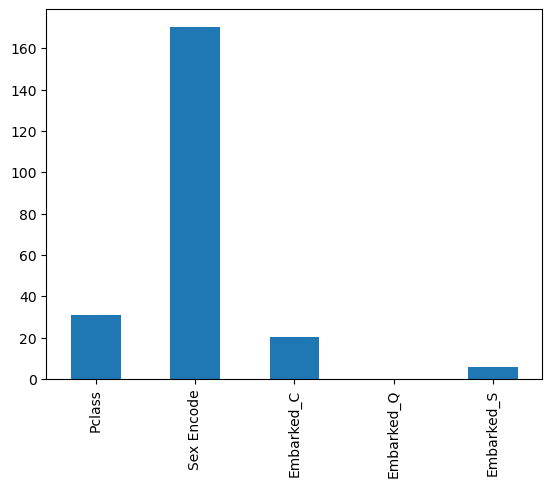

In [ ]:
from sklearn.feature_selection import chi2

# Pisahkan fitur dan target
X = df_categorical.drop(['Survived'], axis=1)
y = df_categorical['Survived']

chi_scores = chi2(X,y)

nilai_chi = pd.Series(chi_scores[0], index = X.columns)
nilai_p = pd.Series(chi_scores[1], index = X.columns)

nilai_chi.plot.bar(),''

<Axes: >

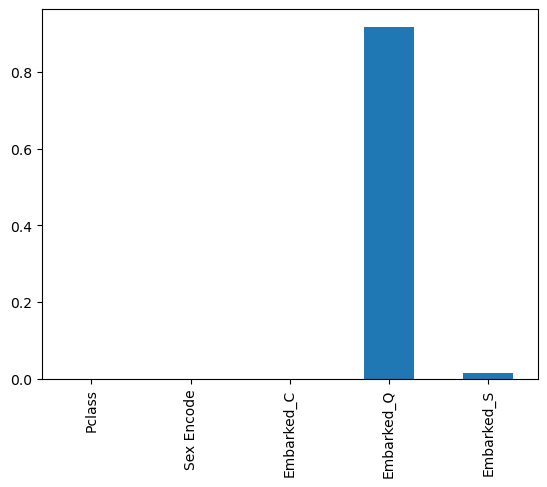

In [ ]:
nilai_p.plot.bar()

Di sini yang paling tidak pengaruh adalah kolom Embarked_Q

## Filter - Correlation

In [ ]:
# Menghitung korelasi antara fitur-fitur
numeric_data = titanic_data[['Age', 'SibSp','Parch','Fare']]

correlation_matrix = numeric_data.corr()

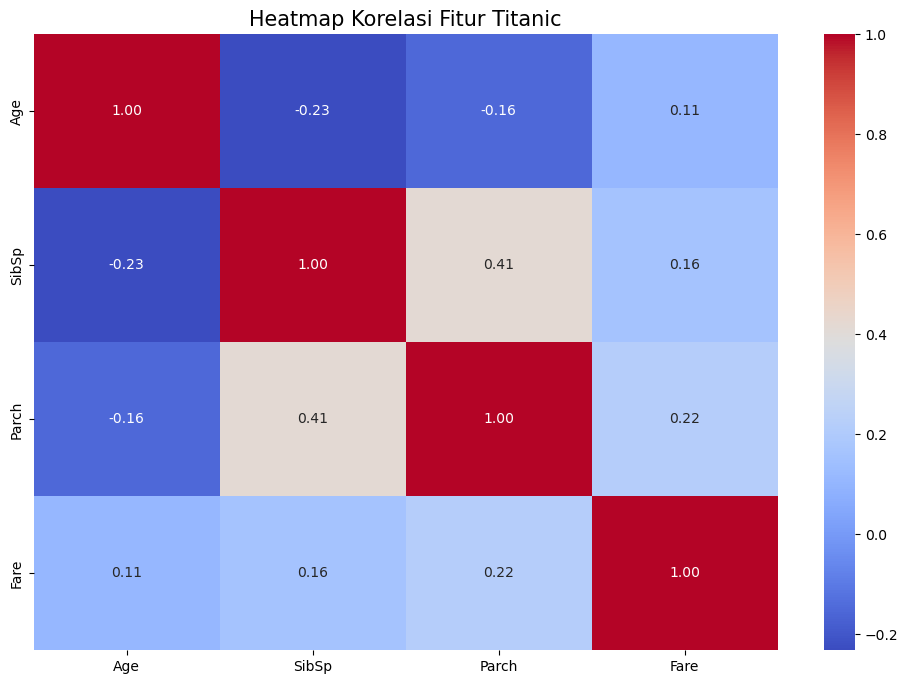

In [ ]:
# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Titanic', fontsize=15)
plt.show()

## Cek Keseimbangan Data

In [ ]:
X = titanic_data.drop(['Survived','Embarked','Sex'], axis=1)
y = titanic_data['Survived']

X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex Encode,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,0,0,1


In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex Encode,Embarked_C,Embarked_Q,Embarked_S
140,3,24.0,0,2,15.2458,1,1,0,0
439,2,31.0,0,0,10.5000,0,0,0,1
817,2,31.0,1,1,37.0042,0,1,0,0
378,3,20.0,0,0,4.0125,0,1,0,0
491,3,21.0,0,0,7.2500,0,0,0,1


In [ ]:
X_train.shape

(712, 9)

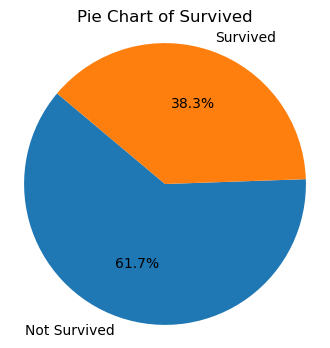

Jumlah Survived:
0    439
1    273
Name: Survived, dtype: int64

Persentase Survived:
0    61.657303
1    38.342697
Name: Survived, dtype: float64


In [ ]:
# Hitung jumlah dan persentase survived
survived_count = y_train.value_counts()
survived_count
survived_percentage = y_train.value_counts(normalize=True) * 100

# Buat pie chart
plt.figure(figsize=(4, 4))  # Ubah ukuran gambar menjadi 4x4
plt.pie(survived_count, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Survived')
plt.axis('equal')  # Untuk memastikan lingkaran berbentuk lingkaran
plt.show()

# Tampilkan jumlah dan persentase survived
print("Jumlah Survived:")
print(survived_count)
print("\nPersentase Survived:")
print(survived_percentage)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X_train_oversampled = X_train
y_train_oversampled = y_train

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train_oversampled, y_train_oversampled)

# Konversi hasil oversampling menjadi DataFrame
df_oversampled = pd.DataFrame(X_resampled, columns=X.columns)
df_oversampled['Survived'] = y_resampled

df_oversampled

,Pclass,Age,SibSp,Parch,Fare,Sex Encode,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,24.0,0,2,15.2458,1,1,0,0,0
1,2,31.0,0,0,10.5000,0,0,0,1,0
2,2,31.0,1,1,37.0042,0,1,0,0,0
3,3,20.0,0,0,4.0125,0,1,0,0,0
4,3,21.0,0,0,7.2500,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
873,2,34.0,0,1,23.0000,1,0,0,1,1
874,1,24.0,1,0,51.8625,1,0,0,1,1
875,1,49.0,1,0,76.7292,1,1,0,0,1
876,3,1.0,1,2,20.5750,0,0,0,1,1


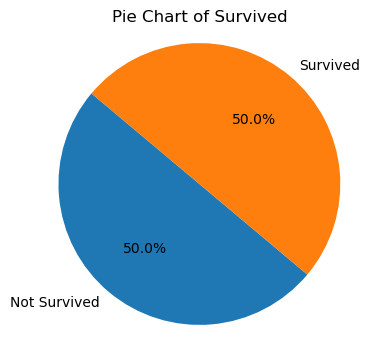

Jumlah Survived:
0    439
1    439
Name: Survived, dtype: int64

Persentase Survived:
0    50.0
1    50.0
Name: Survived, dtype: float64


In [ ]:
# Hitung jumlah dan persentase survived
survived_count = df_oversampled['Survived'].value_counts()
survived_count
survived_percentage = df_oversampled['Survived'].value_counts(normalize=True) * 100

# Buat pie chart
plt.figure(figsize=(4, 4))  # Ubah ukuran gambar menjadi 4x4
plt.pie(survived_count, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Survived')
plt.axis('equal')  # Untuk memastikan lingkaran berbentuk lingkaran
plt.show()

# Tampilkan jumlah dan persentase survived
print("Jumlah Survived:")
print(survived_count)
print("\nPersentase Survived:")
print(survived_percentage)

## Filter - Menghitung Akurasi Sebelum & Sesudah Seleksi Fitur

In [ ]:
df_oversampled.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex Encode', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Survived'],
      dtype='object')

In [ ]:
X_train = df_oversampled.drop(['Survived'], axis=1)
y_train = df_oversampled['Survived']

# model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi model Random Forest dengan seluruh fitur: ", accuracy)

Akurasi model Random Forest dengan seluruh fitur:  0.8435754189944135


In [ ]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex Encode', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
df_oversampled.head()

,Pclass,Age,SibSp,Parch,Fare,Sex Encode,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,24.0,0,2,15.2458,1,1,0,0,0
1,2,31.0,0,0,10.5000,0,0,0,1,0
2,2,31.0,1,1,37.0042,0,1,0,0,0
3,3,20.0,0,0,4.0125,0,1,0,0,0
4,3,21.0,0,0,7.2500,0,0,0,1,0


In [ ]:
X_train = df_oversampled.drop(['Survived','Embarked_Q'], axis=1)
y_train = df_oversampled['Survived']

X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex Encode,Embarked_C,Embarked_S
0,3,24.0,0,2,15.2458,1,1,0
1,2,31.0,0,0,10.5000,0,0,1
2,2,31.0,1,1,37.0042,0,1,0
3,3,20.0,0,0,4.0125,0,1,0
4,3,21.0,0,0,7.2500,0,0,1


In [ ]:
X_test_filter = X_test.drop(['Embarked_Q'], axis=1)
X_test_filter

,Pclass,Age,SibSp,Parch,Fare,Sex Encode,Embarked_C,Embarked_S
495,3,24.0,0,0,14.4583,0,1,0
648,3,24.0,0,0,7.5500,0,0,1
278,3,7.0,4,1,29.1250,0,0,0
31,1,24.0,1,0,146.5208,1,1,0
255,3,29.0,0,2,15.2458,1,1,0
...,...,...,...,...,...,...,...,...
780,3,13.0,0,0,7.2292,1,1,0
837,3,24.0,0,0,8.0500,0,0,1
215,1,31.0,1,0,113.2750,1,1,0
833,3,23.0,0,0,7.8542,0,0,1


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Evaluasi model tanpa penyertaan fitur, 'Embarked_Q'
y_pred = model.predict(X_test_filter)
accuracy = accuracy_score(y_test,y_pred)

print("Akurasi model Random Forest setelah hapus fitur Embarked_Q :", accuracy)

Akurasi model Random Forest setelah hapus fitur Embarked_Q : 0.8324022346368715


## Wrapper - Forward Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_oversampled.head()

,Pclass,Age,SibSp,Parch,Fare,Sex Encode,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,24.0,0,2,15.2458,1,1,0,0,0
1,2,31.0,0,0,10.5000,0,0,0,1,0
2,2,31.0,1,1,37.0042,0,1,0,0,0
3,3,20.0,0,0,4.0125,0,1,0,0,0
4,3,21.0,0,0,7.2500,0,0,0,1,0


In [ ]:
X_train = df_oversampled.drop(['Survived'], axis=1)
y_train = df_oversampled['Survived']
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex Encode,Embarked_C,Embarked_Q,Embarked_S
0,3,24.0,0,2,15.2458,1,1,0,0
1,2,31.0,0,0,10.5000,0,0,0,1
2,2,31.0,1,1,37.0042,0,1,0,0
3,3,20.0,0,0,4.0125,0,1,0,0
4,3,21.0,0,0,7.2500,0,0,0,1


In [ ]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1, random_state=0),
                                                      k_features=(1,9),
                                                      forward=True,
                                                      floating=False,
                                                      verbose=2,
                                                      scoring="accuracy",
                                                      cv=5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.2s finished

[2024-04-09 11:19:17] Features: 1/9 -- score: 0.7642597402597403[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.6s finished

[2024-04-09 11:19:21] Features: 2/9 -- score: 0.8292207792207794[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.2s finished

[2024-04-09 11:19:25] Features: 3/9 -- score: 0.8326363636363636[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 o

In [ ]:
forward_feature_selection.k_feature_idx_

(0, 1, 2, 4, 5)

In [ ]:
f_feature_names = forward_feature_selection.k_feature_names_
f_feature_names = list(f_feature_names)
f_feature_names

['Pclass', 'Age', 'SibSp', 'Fare', 'Sex Encode']

In [ ]:
forward_feature_selection.k_score_

0.8622922077922077

In [ ]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.7443181818181818, 0.7727272727272727, 0.755...",0.76426,"(Sex Encode,)",0.026129,0.020329,0.010165
2,"(4, 5)","[0.8125, 0.8181818181818182, 0.801136363636363...",0.829221,"(Fare, Sex Encode)",0.030496,0.023727,0.011863
3,"(0, 4, 5)","[0.8238636363636364, 0.8352272727272727, 0.784...",0.832636,"(Pclass, Fare, Sex Encode)",0.036145,0.028122,0.014061
4,"(0, 1, 4, 5)","[0.8465909090909091, 0.8068181818181818, 0.835...",0.857727,"(Pclass, Age, Fare, Sex Encode)",0.051791,0.040295,0.020147
5,"(0, 1, 2, 4, 5)","[0.8295454545454546, 0.8238636363636364, 0.840...",0.862292,"(Pclass, Age, SibSp, Fare, Sex Encode)",0.052476,0.040828,0.020414
6,"(0, 1, 2, 3, 4, 5)","[0.8238636363636364, 0.8295454545454546, 0.840...",0.858864,"(Pclass, Age, SibSp, Parch, Fare, Sex Encode)",0.04848,0.037719,0.01886
7,"(0, 1, 2, 3, 4, 5, 7)","[0.8011363636363636, 0.8409090909090909, 0.829...",0.85089,"(Pclass, Age, SibSp, Parch, Fare, Sex Encode, ...",0.04932,0.038373,0.019186
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.7897727272727273, 0.8125, 0.846590909090909...",0.842916,"(Pclass, Age, SibSp, Parch, Fare, Sex Encode, ...",0.048435,0.037684,0.018842
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.8011363636363636, 0.8125, 0.835227272727272...",0.845201,"(Pclass, Age, SibSp, Parch, Fare, Sex Encode, ...",0.050348,0.039173,0.019586


In [ ]:
X_train_sel = X_train[f_feature_names]
X_test_sel = X_test[f_feature_names]

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_sel, y_train)

y_pred = model.predict(X_test_sel)
accuracy = accuracy_score(y_test,y_pred)

print("Akurasi model Random Forest Forward Selection", accuracy)

Akurasi model Random Forest Forward Selection 0.8379888268156425


## Wrapper - Backward Selection

In [ ]:
X_train = df_oversampled.drop(['Survived'], axis=1)
y_train = df_oversampled['Survived']

In [ ]:
backward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1, random_state=0),
                                                      k_features=(1,9),
                                                      forward=False,
                                                      floating=False,
                                                      verbose=2,
                                                      scoring="accuracy",
                                                      cv=5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.7s finished

[2024-04-09 11:19:44] Features: 8/1 -- score: 0.8440714285714286[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.2s finished

[2024-04-09 11:19:53] Features: 7/1 -- score: 0.8497597402597403[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.1s finished

[2024-04-09 11:20:05] Features: 6/1 -- score: 0.8554610389610391[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 o

In [ ]:
backward_feature_selection.k_feature_idx_

(0, 1, 2, 4, 5)

In [ ]:
b_feature_names = backward_feature_selection.k_feature_names_
b_feature_names = list(b_feature_names)
b_feature_names

['Pclass', 'Age', 'SibSp', 'Fare', 'Sex Encode']

In [ ]:
backward_feature_selection.k_score_

0.8622922077922077

In [ ]:
pd.DataFrame.from_dict(backward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.8011363636363636, 0.8125, 0.835227272727272...",0.845201,"(Pclass, Age, SibSp, Parch, Fare, Sex Encode, ...",0.050348,0.039173,0.019586
8,"(0, 1, 2, 4, 5, 6, 7, 8)","[0.7897727272727273, 0.8238636363636364, 0.823...",0.844071,"(Pclass, Age, SibSp, Fare, Sex Encode, Embarke...",0.054038,0.042043,0.021022
7,"(0, 1, 2, 4, 5, 6, 7)","[0.8011363636363636, 0.8238636363636364, 0.835...",0.84976,"(Pclass, Age, SibSp, Fare, Sex Encode, Embarke...",0.051447,0.040028,0.020014
6,"(0, 1, 2, 4, 5, 7)","[0.8011363636363636, 0.8295454545454546, 0.840...",0.855461,"(Pclass, Age, SibSp, Fare, Sex Encode, Embarke...",0.057365,0.044632,0.022316
5,"(0, 1, 2, 4, 5)","[0.8295454545454546, 0.8238636363636364, 0.840...",0.862292,"(Pclass, Age, SibSp, Fare, Sex Encode)",0.052476,0.040828,0.020414
4,"(0, 1, 4, 5)","[0.8465909090909091, 0.8068181818181818, 0.835...",0.857727,"(Pclass, Age, Fare, Sex Encode)",0.051791,0.040295,0.020147
3,"(0, 4, 5)","[0.8238636363636364, 0.8352272727272727, 0.784...",0.832636,"(Pclass, Fare, Sex Encode)",0.036145,0.028122,0.014061
2,"(4, 5)","[0.8125, 0.8181818181818182, 0.801136363636363...",0.829221,"(Fare, Sex Encode)",0.030496,0.023727,0.011863
1,"(5,)","[0.7443181818181818, 0.7727272727272727, 0.755...",0.76426,"(Sex Encode,)",0.026129,0.020329,0.010165


In [ ]:
X_train_sel = X_train[b_feature_names]
X_test_sel = X_test[b_feature_names]

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_sel, y_train)

y_pred = model.predict(X_test_sel)
accuracy = accuracy_score(y_test,y_pred)

print("Akurasi model Random Forest Backward Selection", accuracy)

Akurasi model Random Forest Backward Selection 0.8379888268156425


## Wrapper - Exhaustive Search

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [ ]:
X_train = df_oversampled.drop(['Survived'], axis=1)
y_train = df_oversampled['Survived']

In [ ]:
efs = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1, random_state=0),
                                min_features=1,
                                max_features=9,
                                scoring='accuracy',
                                cv=2,
                                n_jobs=-1).fit(X_train, y_train)

Features: 511/511

In [ ]:
efs_feature_names = efs.best_feature_names_
efs_feature_names = list(efs_feature_names)
efs_feature_names

['Pclass', 'Age', 'SibSp', 'Fare', 'Sex Encode']

In [ ]:
efs.best_score_

0.8485193621867881

In [ ]:
pd.DataFrame.from_dict(efs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.662870159453303, 0.6583143507972665]",0.660592,"(Pclass,)",0.009801,0.002278,0.002278
1,"(1,)","[0.5785876993166287, 0.5580865603644647]",0.568337,"(Age,)",0.044105,0.010251,0.010251
2,"(2,)","[0.5444191343963554, 0.5945330296127562]",0.569476,"(SibSp,)",0.107811,0.025057,0.025057
3,"(3,)","[0.5808656036446469, 0.5649202733485194]",0.572893,"(Parch,)",0.034304,0.007973,0.007973
4,"(4,)","[0.6560364464692483, 0.6993166287015945]",0.677677,"(Fare,)",0.09311,0.02164,0.02164
...,...,...,...,...,...,...,...
506,"(0, 1, 2, 4, 5, 6, 7, 8)","[0.8132118451025057, 0.8678815489749431]",0.840547,"(Pclass, Age, SibSp, Fare, Sex Encode, Embarke...",0.117612,0.027335,0.027335
507,"(0, 1, 3, 4, 5, 6, 7, 8)","[0.7813211845102506, 0.8656036446469249]",0.823462,"(Pclass, Age, Parch, Fare, Sex Encode, Embarke...",0.181319,0.042141,0.042141
508,"(0, 2, 3, 4, 5, 6, 7, 8)","[0.7927107061503417, 0.8109339407744874]",0.801822,"(Pclass, SibSp, Parch, Fare, Sex Encode, Embar...",0.039204,0.009112,0.009112
509,"(1, 2, 3, 4, 5, 6, 7, 8)","[0.7995444191343963, 0.856492027334852]",0.828018,"(Age, SibSp, Parch, Fare, Sex Encode, Embarked...",0.122513,0.028474,0.028474


In [ ]:
X_train_sel = X_train[efs_feature_names]
X_test_sel = X_test[efs_feature_names]

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_sel, y_train)

y_pred = model.predict(X_test_sel)
accuracy = accuracy_score(y_test,y_pred)

print("Akurasi model Random Forest Exhaustive Search", accuracy)

Akurasi model Random Forest Exhaustive Search 0.8379888268156425


## Embedded - Lasso

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train = df_oversampled.drop(['Survived'], axis=1)
y_train = df_oversampled['Survived']

In [ ]:
# C makin besar makin tidak berpengaruh
sel = SelectFromModel(LogisticRegression(penalty="l1",
                                         C=0.1,
                                         solver="liblinear"
                                         ))

In [ ]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             solver='liblinear'))

In [ ]:
sel.get_feature_names_out()

array(['Pclass', 'Age', 'SibSp', 'Fare', 'Sex Encode'], dtype=object)

In [ ]:
# True kolom yang signifikan, False kolom tidak signifikan
sel.get_support()

array([ True,  True,  True, False,  True,  True, False, False, False])

In [ ]:
# Mengambil kolom yang penting
X_train1 = sel.transform(X_train)
X_test1 = sel.transform(X_test)

In [ ]:
X_train1.shape

(878, 5)

In [ ]:
glm = LogisticRegression()
glm.fit(X_train1, y_train)

LogisticRegression()

In [ ]:
y_pred = glm.predict(X_test1)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [ ]:
accuracy_score(y_test, y_pred)

0.7932960893854749